<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### __1.Boxplot for Median value of owner-occupied homes__

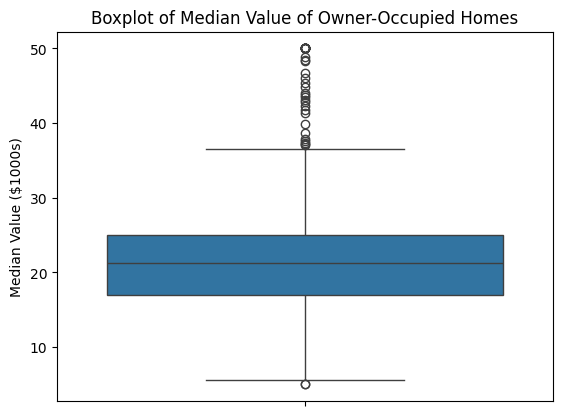

In [9]:
sns.boxplot(y='MEDV',data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

#### __2.Barchart for the Charles River variables__

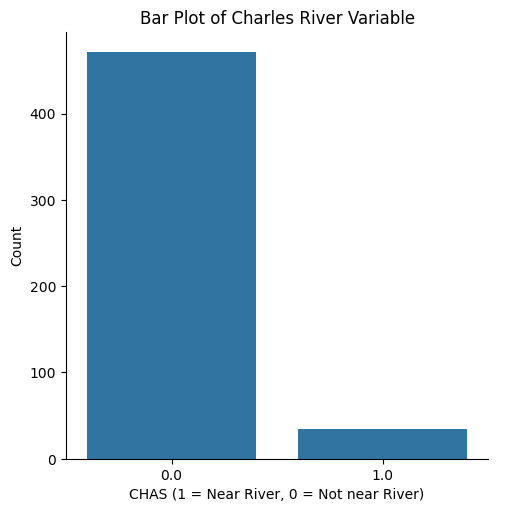

In [14]:
sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('CHAS (1 = Near River, 0 = Not near River)')
pyplot.ylabel('Count')
pyplot.show()

##### __3.Boxplot for the MEDV variable vs the AGE variable__

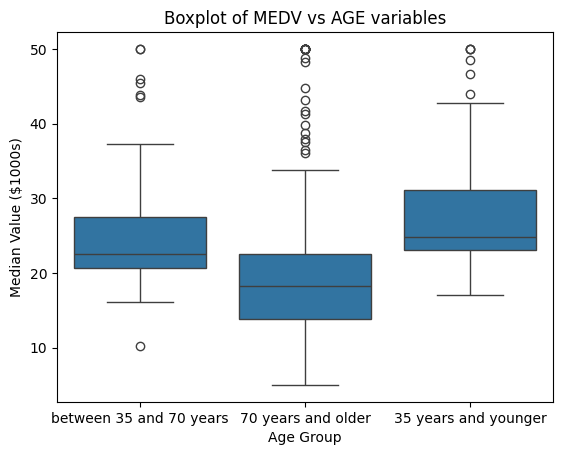

In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
pyplot.title('Boxplot of MEDV vs AGE variables')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

#### __4.Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town__

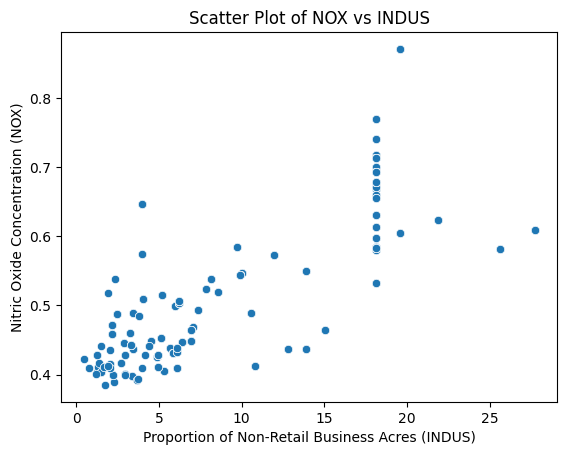

In [19]:
sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.show()

#### __5.Histogram for the pupil to teacher ratio variable__

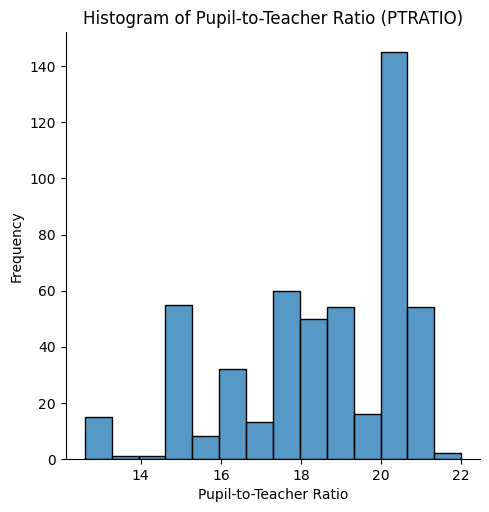

In [20]:
sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### __Task:Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)__

#####   Null hypothesis: there's no significant difference in median value of houses bounded by the Charles river
#####   Alternative hypothesis: there's a significant difference in median value of houses bounded by the Charles river

In [23]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### Conclusion: P-value is less than 0.05, so we reject the null Hypothesis.
##### There is a significant difference in median value of houses bounded by the Charles river or not

#### __Task:Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)__

##### Null hypotesis: there is no significant difference in median values of houses for each proportion of owner occpied units built prior to 1940
##### Alternative hypothesis: there is a statistical difference in median values of houses for each proportion of owner occpied units built prior to 1940

In [28]:
model = ols('MEDV ~ AGE', data = boston_df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
AGE,1.0,6069.761065,6069.761065,83.477459,1.569982e-18
Residual,504.0,36646.534350,72.711378,NaN,NaN


##### Conclusion: P-value is less than 0.05, so we reject the null hypothesis.
##### There is statistical difference in median values of houses for each proportion of owner occpied units built prior to 1940.

#### __Task:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)__

##### Null hypothesis: There is no correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town
##### Alternative hypothesis: There is a correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town

In [32]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### Conclusion: P-value is less than 0.05, so we reject the null hypothesis.
##### there is a positive relationshio between Nitric oxide concentration and the proportion of non-retail business acres per town

#### __Task:What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)__

##### Null Hypothesis:The weighted distance to five Boston employment centers has no impact on the median value of owner occupied homes.
##### Alternative Hypothesis:The weighted distance to five Boston employment centers has an impact on the median value of owner occupied homes.

In [36]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        19:22:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Conclusion: P-value is less than 0.05, so we reject null hypothesis
##### There is a statistical difference between the weighted distance to five Boston employment centers and the median value of owner occupied homes.
##### For every additional weight distance increase, the median value of owner occupied homes increases by approximately $ 1,091.60.